In [1]:
import torch.optim as optim
from src.env.pig_game import PigGame
from src.env.dummy_player import DummyPlayer 
from src.model.actor_critic import Actor, Critic
from src.loop.training_loop import training_loop

In [2]:
env = PigGame()

actor = Actor()  
critic = Critic()

dummy = DummyPlayer()

In [3]:
actor_optimizer = optim.Adam(actor.parameters(), lr=1e-3)
critic_optimizer = optim.Adam(critic.parameters(), lr=1e-3)

num_episodes = 1e3
gamma = 0.99

In [4]:
rewards = training_loop(
    env=env, 
    actor=actor, 
    critic=critic, 
    dummy=dummy, 
    actor_optimizer=actor_optimizer, 
    critic_optimizer=critic_optimizer, 
    gamma=gamma, 
    num_episodes=int(num_episodes), 
    debug=False
)

/home/lewelotki/PigGame/src/loop/training_loop.py:167: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(state, dtype=torch.float32)
/home/lewelotki/PigGame/src/loop/training_loop.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  next_state = torch.tensor(next_state, dtype=torch.float32)  # Convert to tensor
/home/lewelotki/PigGame/src/loop/training_loop.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  next_state = torch.tensor(next_state, dtype=torch.float32)  # Convert to tensor
/home/lewelotki/PigGame/src/loop/

Episode 0 finished, Total Reward: -54.0
Episode 100 finished, Total Reward: -9.0
Episode 200 finished, Total Reward: 7.0
Episode 300 finished, Total Reward: 22.0
Episode 400 finished, Total Reward: 12.0
Episode 500 finished, Total Reward: 20.0
Episode 600 finished, Total Reward: 16.0
Episode 700 finished, Total Reward: 8.0
Episode 800 finished, Total Reward: 25.0
Episode 900 finished, Total Reward: 19.0


In [5]:
import numpy as np

# Function to calculate moving average
def moving_average(values, window):
    """
    Computes the moving average of the values with the given window size.
    
    Parameters:
    - values: List or array of rewards
    - window: Window size for the moving average
    
    Returns:
    - moving_avg: Array of moving average values
    """
    return np.convolve(values, np.ones(window) / window, mode='valid')

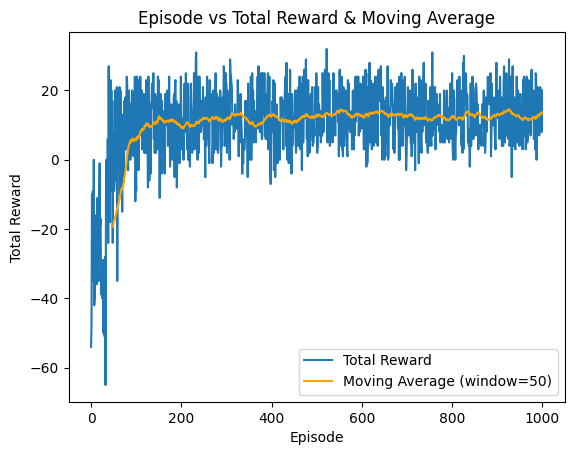

In [6]:
import matplotlib.pyplot as plt

window_size = 50
moving_avg_rewards = moving_average(rewards, window_size)

plt.plot(range(len(rewards)), rewards, label='Total Reward')
plt.plot(range(window_size - 1, len(rewards)), moving_avg_rewards, label=f'Moving Average (window={window_size})', color='orange')

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Total Reward')
# plt.ylim([-200,200])
# plt.xlim([0,200])
plt.title('Episode vs Total Reward & Moving Average')
plt.legend()

plt.show()
